**Rename your completed notebook as `Project1_YOURNAME.ipynb` and submit it on BlackBoard.**

# PART I: 911 Calls Dataset

In Part I, we will be analyzing some 911 call data. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

**Import numpy and pandas**

In [ ]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read in the csv file as a dataframe called df**

In [ ]:
df = pd.read_csv('/content/911.csv')
print(df)

             lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...  19003.0   
99489 

**Check the info() of the df**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df (first 3 rows)**

In [ ]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

**Show the top 5 zipcodes for 911 calls**

In [ ]:
# top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Show the top 5 townships (twp) for 911 calls**

In [ ]:
# top 5 zipcodes for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [ ]:
# number of unique title code in the data set
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [ ]:
df['Reason'] = df['title'].apply(lambda title: title.split(":")[0]) #creating a new column 'reason'

**Count 911 calls based off of this new column by Reason**

In [ ]:
df['Reason'].value_counts()  #getting the most common reason for calling 911

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Use seaborn to create a countplot of 911 calls by Reason.**

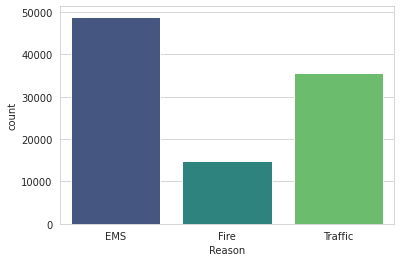

In [ ]:
sns.countplot(x='Reason',data=df,palette='viridis')

**Show the data type of the objects in the timeStamp column?**

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

<class 'pandas.core.series.Series'>


**These timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [ ]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**The Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dmap)

**Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

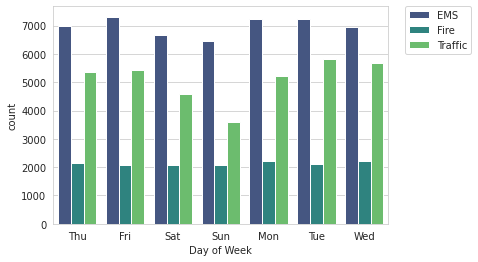

In [ ]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # To relocate the legend

**Now do the same for Month:**

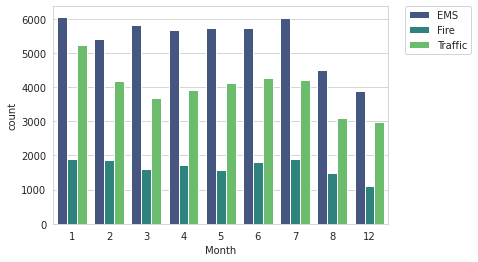

In [ ]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # To relocate the legend

**You should have noticed it was missing some Months, we fill in this information by plotting the information with a simple line plot that fills in the missing months**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method to show the head of this returned DataFrame.**

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe with .plot() indicating the count of calls per month.**

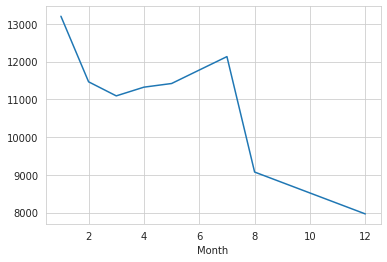

In [ ]:
byMonth['twp'].plot()

**Use seaborn's lmplot() to create a linear fit on the number of calls per month. You may need to reset the index to a column.**

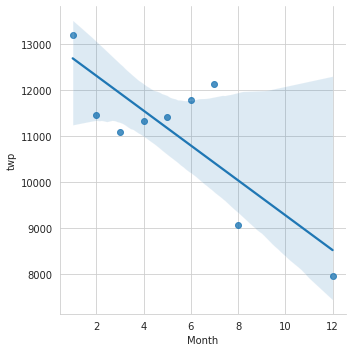

In [ ]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [ ]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

**Groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

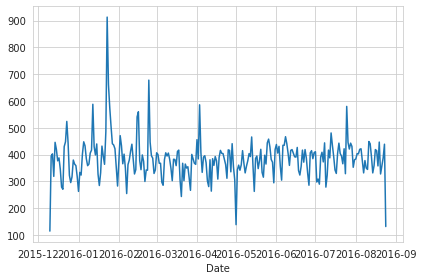

In [ ]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

**Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call. Title the plot. Use plt.tight_layout() to adjust the axis**

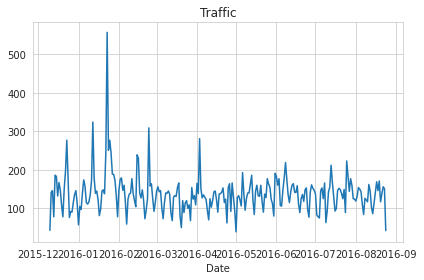

In [ ]:
df[df['Reason'] == "Traffic"].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

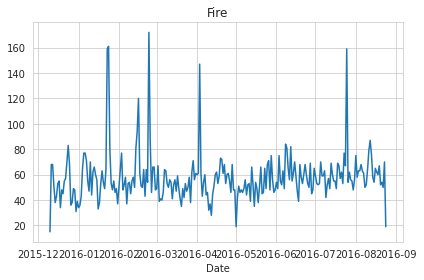

In [ ]:
df[df['Reason'] == "Fire"].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

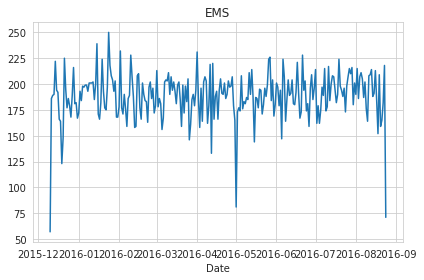

In [ ]:
df[df['Reason'] == "EMS"].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

# PART II: Stock Trading (Cont'd)

Part II involves coding problems relevant to the lecture notebook ``Stock Trading.ipynb``.

1. Write a function ``ema_trade`` for moving average based trading, using the sample codes in ``Stock Trading.ipynb`` with the following input arguments:

-  ``ticker``: ticker of a stock
-  ``start``: start date of the trading period
-  ``end``: end date of the trading period
-  ``fast_ema_span``: span (window length) of the fast EMA with narrow window
-  ``slow_ema_span``:  span of the slow EMA with wide window

You will just load the data from ``stooq``. ``ema_trade``function does not return anything but only plots the trades and volumes on time series and the accumulated return rates (for both the EMA and buy/hold strateges) **on the same camvas**.

Import appropriate libraries and complete the following cells:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_datareader as pdr
import datetime

import warnings
warnings.filterwarnings("ignore")


In [4]:
def ema_trade(ticker, start, end, fast_ema_span, slow_ema_span):
  stock = pdr.data.DataReader(name = ticker, data_source ='stooq', start = start, end = end)
  data = stock.iloc[::-1]
  data['5-day'] = data['Open'].ewm(span=5, adjust = False).mean()
  data['14-day'] = data['Open'].ewm(span=14, adjust = False).mean()
  price = data['Open']
  ema14 = data['14-day']
  ema5 = data['5-day']
  data['signal'] = np.where(data['5-day'] > data['14-day'], 1, 0)
  data['signal'] = np.where(data['5-day'] < data['14-day'], -1, data['signal'])
  data['return'] = -np.log(data['Open']).diff(-1)
  data['strategy_return'] = data['return']*data['signal']
  data['entry'] = data['signal'].diff()
  long = data[['Open']][data['entry'] ==2]
  short = data[['Open']][data['entry'] <0]
  fig, ax = plt.subplots(3,1,gridspec_kw={'height_ratios': [4, 1,4]}, figsize = (14,12)) 
  fig.tight_layout(pad= 2)
  ax[0].plot(price, label = 'Price')
  ax[0].plot(ema5, label = 'EMA-5')
  ax[0].plot(ema14, label = 'EMA-14')
  ax[0].plot(long, '^', color = 'k', markersize= 12, label = 'Long')
  ax[0].plot(short, 'v', color = 'r', markersize= 12, label = 'Short')
  ax[0].set_ylabel('Price in $', fontsize = 16)
  ax[0].set_title('Trades', fontsize = 16)
  ax[0].grid(False)
  ax[1].bar(data.index, height = data['Volume'], width=2, color='blue')
  ax[1].set_ylabel('Volume', fontsize = 16)
  ax[1].grid(True)
  ax[2].plot(100*np.exp(data['strategy_return']).cumprod(), label = 'EMA Strategy')
  ax[2].plot(100*np.exp(data['return']).cumprod(), label = 'Buy/Hold')
  ax[2].legend(loc='best')
  ax[2].set_ylabel('Return in %')
  ax[2].set_title('Returns', fontsize = 16)
  ax[2].grid(False)
  
    

Reproduce the results/plots in the notebook by simply calling ``ema_trade`` with 5-day and 14-day EMAs, and **label the curves and markers properly** as in the referenced plots.

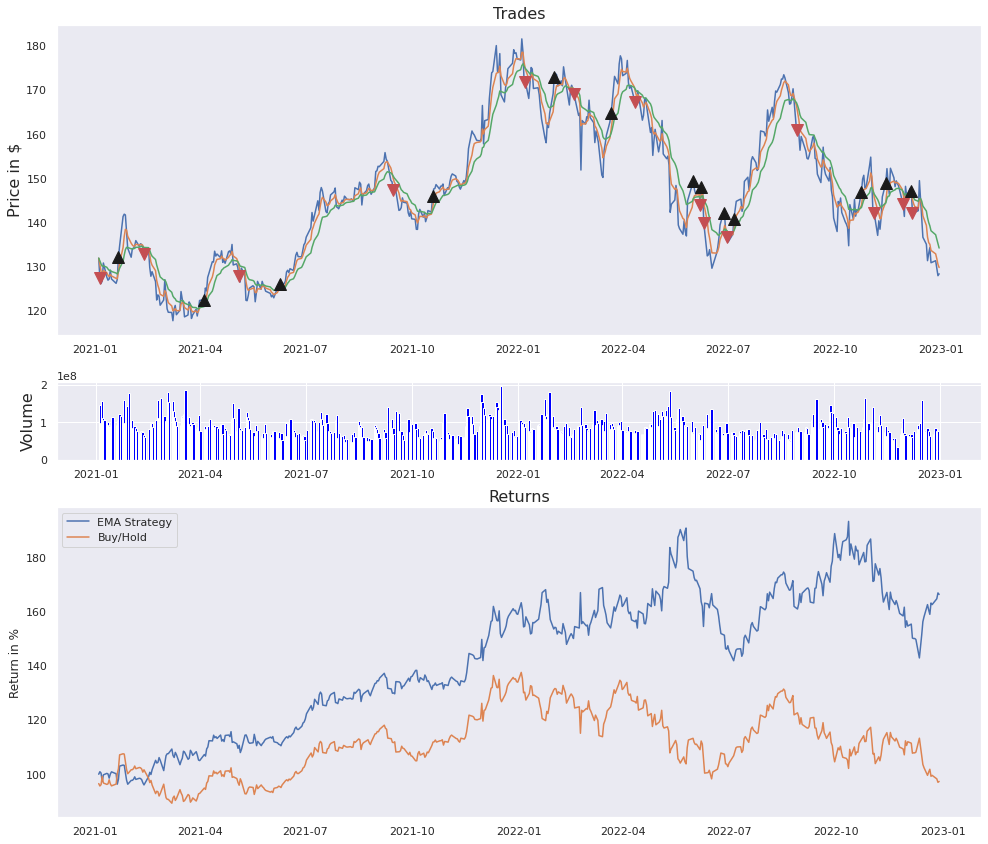

In [5]:
ema_trade('AAPL', '2021-01-01', '2022-12-31', 5, 14)

2. Write a new trading function ``ema_trade_no_short`` which acts long buy trades (and sell to close long position) only, but no short sell trades. The trading signals are the same as that in the previous trading mode:

 - When the fast EMA timeseries crosses the slow EMA timeseries from below (i.e., fast_EMA(t) > slow_EMA(t)), we will go long (buy) one share of the stock. In this case, we take ``signal`` = 1.

 - When the fast EMA timeseries crosses the slow EMA timeseries from above (i.e., fast_EMA(t) < slow_EMA(t)), we will close existing long position (but don't open short sell position). In this case, we still use ``signal`` = -1.
 
Complete the following cells:

In [6]:
def ema_trade_no_short(ticker, start, end, fast_ema_span, slow_ema_span):
  stock = pdr.data.DataReader(name = ticker, data_source ='stooq', start = start, end = end)
  data = stock.iloc[::-1]
  data['5-day'] = data['Open'].ewm(span=5, adjust = False).mean()
  data['14-day'] = data['Open'].ewm(span=14, adjust = False).mean()
  price = data['Open']
  ema14 = data['14-day']
  ema5 = data['5-day']
  data['signal'] = np.where(data['5-day'] > data['14-day'], 1, 0)
  data['signal'] = np.where(data['5-day'] < data['14-day'], -1, data['signal'])
  data['return'] = -np.log(data['Open']).diff(-1)
  data['strategy_return'] = data['return']*data['signal']
  data['entry'] = data['signal'].diff()
  long = data[['Open']][data['entry'] ==2]
  short = data[['Open']][data['entry'] <0]
  fig, ax = plt.subplots(3,1,gridspec_kw={'height_ratios': [4, 1,4]}, figsize = (14,12)) 
  fig.tight_layout(pad= 2)
  ax[0].plot(price, label = 'Price')
  ax[0].plot(ema5, label = 'EMA-5')
  ax[0].plot(ema14, label = 'EMA-14')
  ax[0].plot(long, '^', color = 'k', markersize= 12, label = 'Long')
  ax[0].plot(short, 'v', color = 'r', markersize= 12, label = 'Short')
  ax[0].set_ylabel('Price in $', fontsize = 16)
  ax[0].set_title('Trades', fontsize = 16)
  ax[0].grid(False)
  ax[1].bar(data.index, height = data['Volume'], width=2, color='blue')
  ax[1].set_ylabel('Volume', fontsize = 16)
  ax[1].grid(True)
  ax[2].plot(100*np.exp(data['strategy_return']).cumprod(), label = 'EMA Strategy')
  ax[2].plot(100*np.exp(data['return']).cumprod(), label = 'Buy/Hold')
  ax[2].legend(loc='best')
  ax[2].set_ylabel('Return in %')
  ax[2].set_title('Returns', fontsize = 16)
  ax[2].grid(False) 
    
    
 

Run ``ema_trade_no_short`` with the same input arguments. Please **label the curves and markers properly** as in the referenced plots.

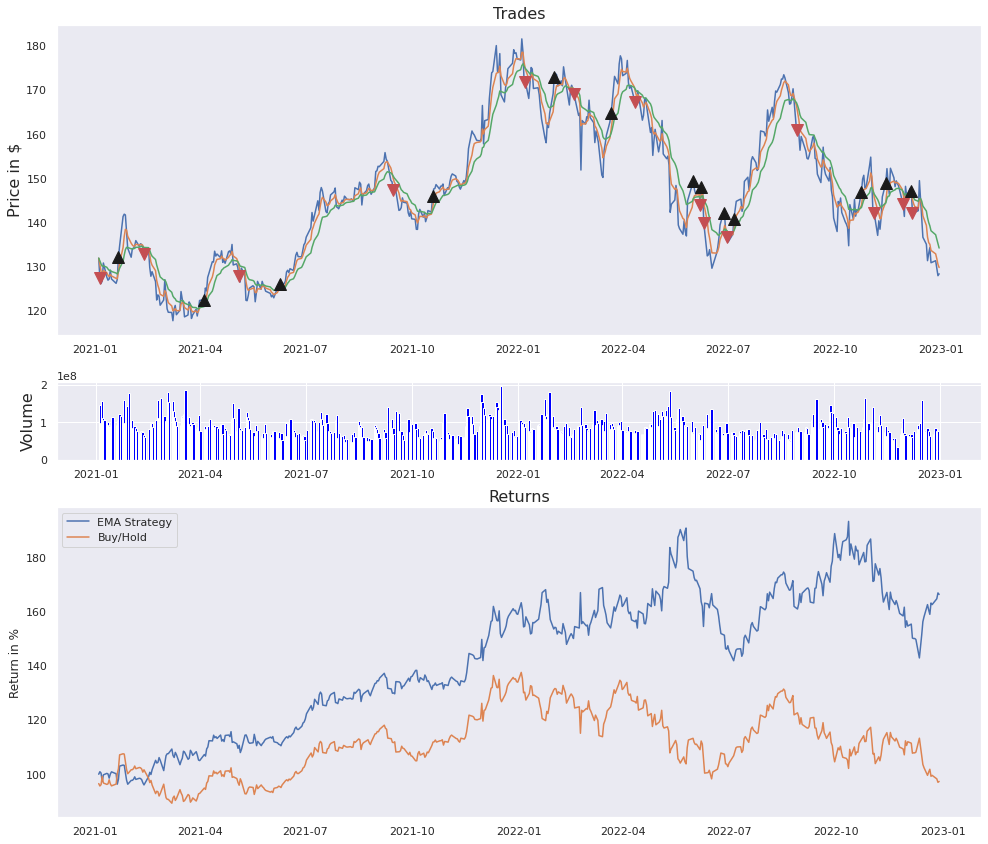

In [7]:
ema_trade_no_short('AAPL', '2021-01-01', '2022-12-31', 5, 14)